# ⚜ 붓꽃 품종 분류

## 📦 데이터 준비

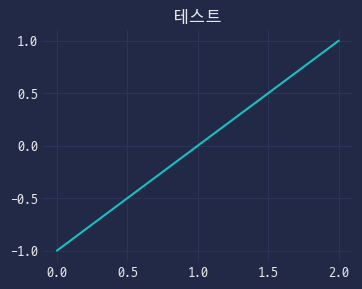

In [5]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

pd.Series([-1,0,1]).plot(figsize=(4,3), title='테스트')
plt.show()

In [6]:
from sklearn.datasets import load_iris
 
# 붓꽃 데이터 로딩
iris = load_iris()
 
iris.keys()
 
# 독립변수
feature = iris.data
feature_name = iris.feature_names
 
# 종속변수
target = iris.target
target_name = iris.target_names
 
# 데이터프레임 만들기
df_iris = pd.DataFrame(feature, columns=feature_name)
df_iris['species'] = target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


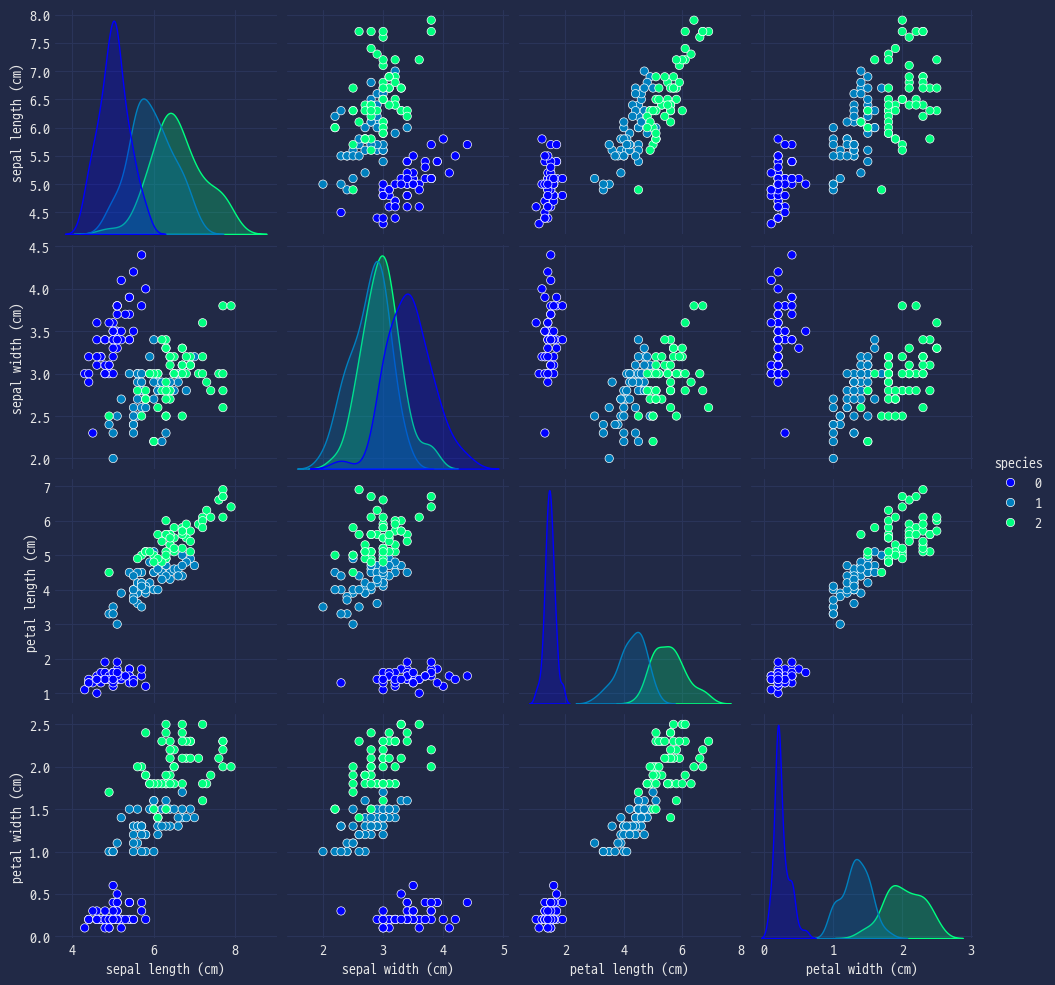

In [16]:
sns.pairplot(data=df_iris, hue='species', palette='winter')
plt.show()

## 🎛️ 독립변수와 종속변수

In [21]:
from sklearn.model_selection import train_test_split

X = feature
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)